In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [5]:
# ==============================
# Load data and create a tidy DataFrame
# ==============================
# WHAT: We load the classic Iris dataset (150 samples, 4 features, 3 classes).
# WHY: It is small, clean, and perfect for demonstrating visualization + KNN.
# HOW: We store features + numeric label + readable species name in a DataFrame.
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species_id"] = iris.target
df["species_name"] = [iris.target_names[i] for i in iris.target]

print("First 10 rows just to verify the structure:\n")
print(df.head(10))
print("\nColumns:", list(df.columns))
print("Classes:", list(iris.target_names))
print()

First 10 rows just to verify the structure:

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   species_id species_name  
0           0       setosa  
1           0       setosa 

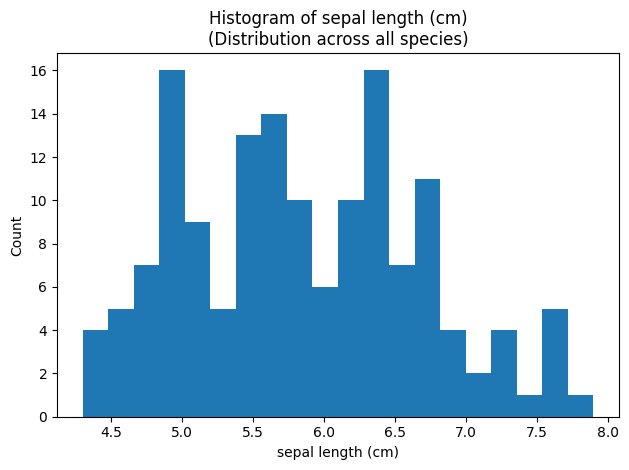

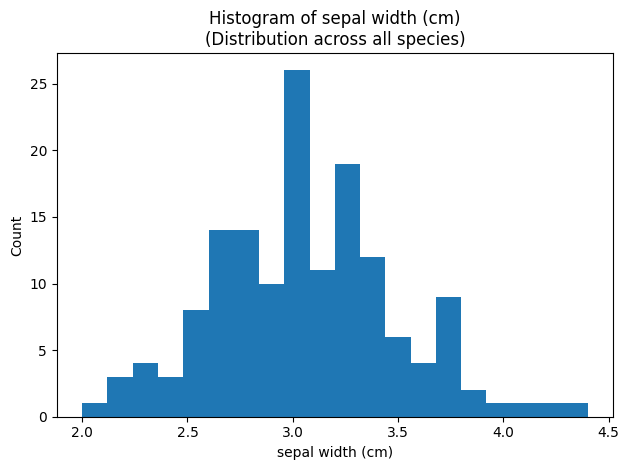

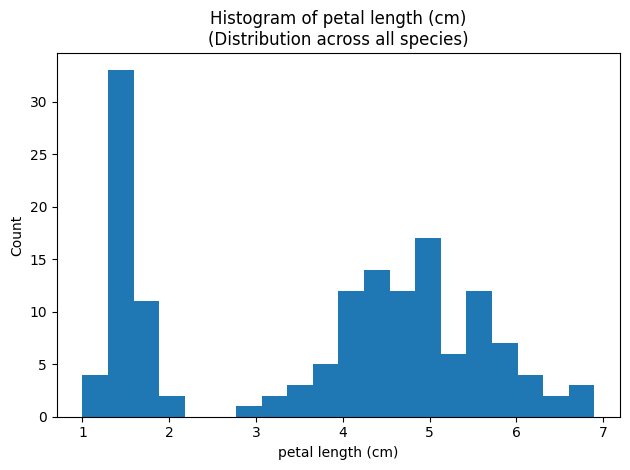

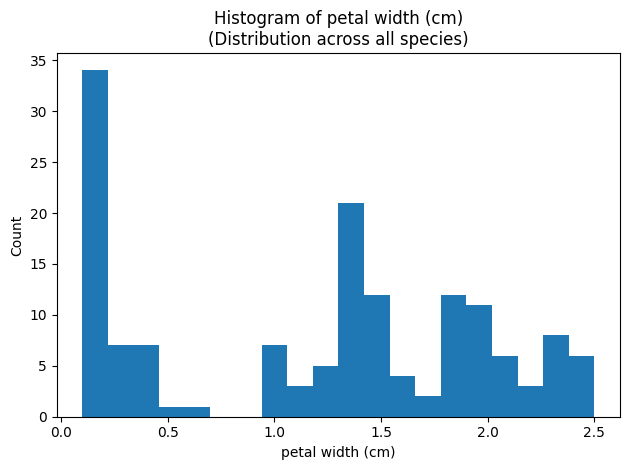

In [6]:
# ==============================
# 1) Histograms for each feature
# ==============================
# WHAT: Simple distributions (frequency of values) for each numeric feature.
# WHY: Shape (e.g., uni/bimodal), spread, and outliers hint at class separability.
# HOW: Look at the bins—tight vs wide spread, distinct peaks suggest informative features.
for col in iris.feature_names:
    plt.figure()
    plt.hist(df[col], bins=20)
    plt.title(f"Histogram of {col}\n(Distribution across all species)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-3905603534.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grouped, labels=list(iris.target_names))


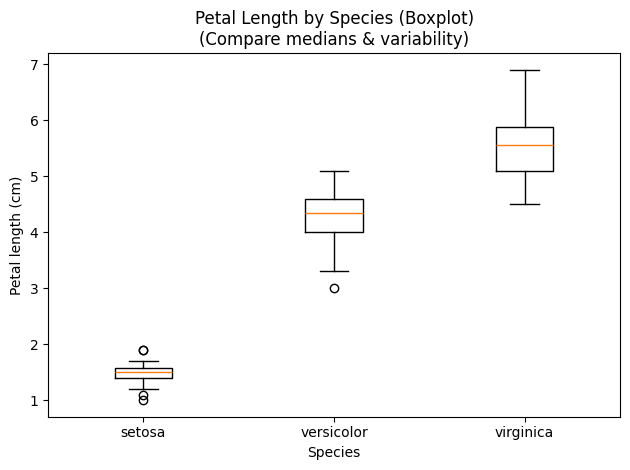

In [7]:
# ==============================
# 2) Boxplot of Petal Length by species
# ==============================
# WHAT: Compares the distribution (median, IQR, potential outliers) of petal length
#       across the three species.
# WHY: If boxes/medians barely overlap, this feature is great for classification.
# HOW: Compare median lines and box heights across species.
plt.figure()
grouped = [df[df["species_name"] == name]["petal length (cm)"] for name in iris.target_names]
plt.boxplot(grouped, labels=list(iris.target_names))
plt.title("Petal Length by Species (Boxplot)\n(Compare medians & variability)")
plt.xlabel("Species")
plt.ylabel("Petal length (cm)")
plt.tight_layout()
plt.show()


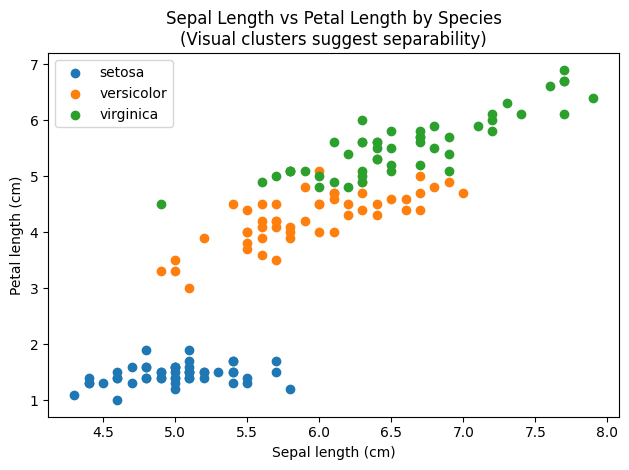

In [9]:
# ==============================
# 3) 2D Scatter: Sepal Length vs Petal Length, labeled by class
# ==============================
# WHAT: Joint relationship between two features with species labels.
# WHY: Cluster separation in 2D space shows if these features can discriminate classes.
# HOW: Each group of points corresponds to one species. Distinct clusters => separability.
plt.figure()
for i, name in enumerate(iris.target_names):
    subset = df[df["species_name"] == name]
    plt.scatter(subset["sepal length (cm)"], subset["petal length (cm)"], label=name)
plt.title("Sepal Length vs Petal Length by Species\n(Visual clusters suggest separability)")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Petal length (cm)")
plt.legend()
plt.tight_layout()
plt.show()

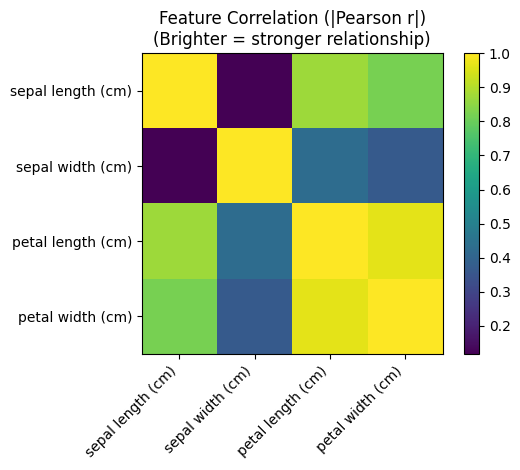

In [10]:
# ==============================
# 4) Correlation heatmap (absolute Pearson r)
# ==============================
# WHAT: Shows linear correlation strength between all pairs of features.
# WHY: Very high correlation can mean redundancy; low correlation may add complementary info.
# HOW: Brighter cells = stronger |r|. Diagonal is 1.0 (feature vs itself).
corr = df[iris.feature_names].corr().abs()
plt.figure()
im = plt.imshow(corr.values, interpolation="nearest")
plt.title("Feature Correlation (|Pearson r|)\n(Brighter = stronger relationship)")
plt.xticks(ticks=np.arange(len(iris.feature_names)), labels=iris.feature_names, rotation=45, ha="right")
plt.yticks(ticks=np.arange(len(iris.feature_names)), labels=iris.feature_names)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

Test Accuracy (KNN, k=3, all 4 features): 1.000


<Figure size 640x480 with 0 Axes>

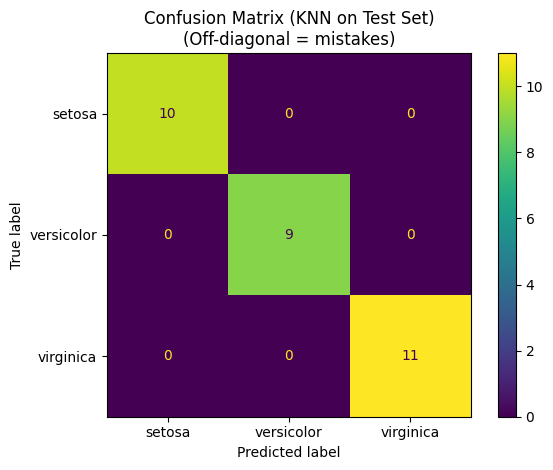

In [11]:
# ==============================
# 5) Simple baseline model: KNN with all 4 features
# ==============================
# WHAT: Split data into train/test and fit KNN (k=3).
# WHY: Establish a quick baseline classifier; Iris is often near-perfect.
# HOW: Print accuracy and draw a confusion matrix to see any misclassifications.
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy (KNN, k=3, all 4 features): {acc:.3f}")

cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
plt.figure()
disp.plot(values_format="d")
plt.title("Confusion Matrix (KNN on Test Set)\n(Off-diagonal = mistakes)")
plt.tight_layout()
plt.show()

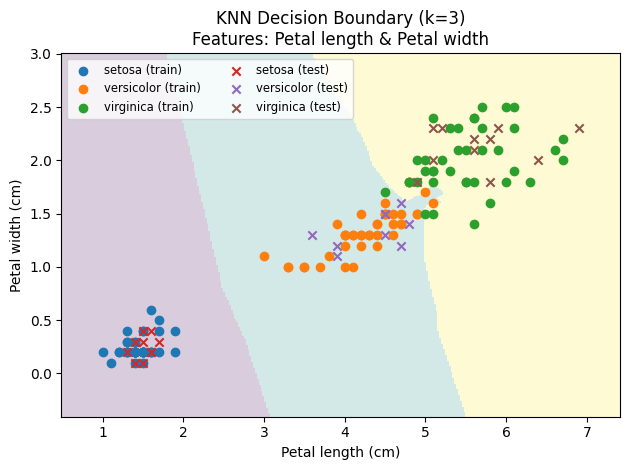

In [12]:
# ==============================
# 6) Decision boundary (2D) with just petal length & petal width
# ==============================
# WHAT: Visualize how KNN partitions the 2D space of two informative features.
# WHY: Intuitive picture of classification regions and boundaries.
# HOW:
#   a) Fit KNN on the two features
#   b) Create a grid over feature range
#   c) Predict class on the grid and color the background by predicted class
#   d) Plot train/test points on top to see where they fall
X_two = df[["petal length (cm)", "petal width (cm)"]].values
y_all = df["species_id"].values

X2_train, X2_test, y2_train, y2_test = train_test_split(X_two, y_all, test_size=0.2, random_state=42)
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X2_train, y2_train)

# Create a mesh grid for visualization
x_min, x_max = X_two[:, 0].min() - 0.5, X_two[:, 0].max() + 0.5
y_min, y_max = X_two[:, 1].min() - 0.5, X_two[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid_points = np.c_[xx.ravel(), yy.ravel()]

Z = knn2.predict(grid_points).reshape(xx.shape)

plt.figure()
# background class regions
plt.pcolormesh(xx, yy, Z, shading="auto", alpha=0.2)

# training points
for i, name in enumerate(iris.target_names):
    pts = X2_train[y2_train == i]
    plt.scatter(pts[:, 0], pts[:, 1], label=f"{name} (train)")

# test points (different marker)
for i, name in enumerate(iris.target_names):
    pts = X2_test[y2_test == i]
    plt.scatter(pts[:, 0], pts[:, 1], marker="x", label=f"{name} (test)")

plt.title("KNN Decision Boundary (k=3)\nFeatures: Petal length & Petal width")
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.legend(loc="upper left", ncol=2, fontsize="small")
plt.tight_layout()
plt.show()

In [13]:
# Calculate precision for each class
# Precision = True Positives / (True Positives + False Positives)
precision = cm.diagonal() / cm.sum(axis=0)

print(f"Test Accuracy: {acc:.3f}")
print("Precision per class:")
for i, name in enumerate(iris.target_names):
    print(f"  {name}: {precision[i]:.3f}")

Test Accuracy: 1.000
Precision per class:
  setosa: 1.000
  versicolor: 1.000
  virginica: 1.000
